In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.ensemble import GradientBoostingRegressor

from illumine.visual import plain_tree

In [2]:
X1 = np.arange(0, 10, 0.1) + np.random.rand(100)
X2 = np.arange(10, 20, 0.1) + np.random.rand(100)

y = np.sin(X1).ravel() + np.cos(X2).ravel()
X_df = pd.DataFrame(np.array([X1, X2]).T, columns=['x1', 'x2'])

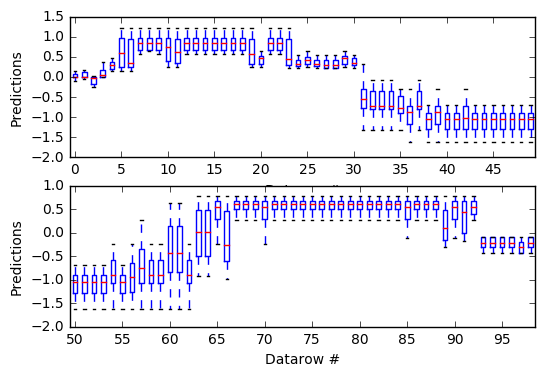

In [3]:
%matplotlib inline

sk_ensemble = GradientBoostingRegressor(n_estimators=10, )
sk_ensemble.fit(X_df, y)
plain_tree.active_leaves_boxplot(sk_ensemble, X_df, n_ax_rows=2)

plt.show()

In [4]:
from illumine.woodland import gather_leaf_values
from illumine.visual import leaf_rank_barplot

[x1>3.50853 & x2<=16.59536 & x2>14.07928]: 70.974
[x1<=2.83162 & x1<=3.50853 & x2>11.13756]: 58.885
[x1<=9.74451 & x1>3.50853 & x2>16.59536]: 38.625
[x1<=9.58156 & x1>3.50853 & x2>16.92768]: 37.906
[x1<=6.69289 & x1>3.50853 & x2>14.23339]: 34.822
[x1<=6.08436 & x1>3.50853 & x2<=16.92768]: 33.034
[x1<=5.85603 & x1>3.50853 & x2<=16.92768]: 28.858
[x1>4.24328 & x2<=16.92768 & x2>13.2632]: 27.498
[x1<=6.76616 & x1>3.50853 & x2>14.44484]: 21.688
[x1<=5.85603 & x2<=17.12857 & x2>13.40947]: 20.076


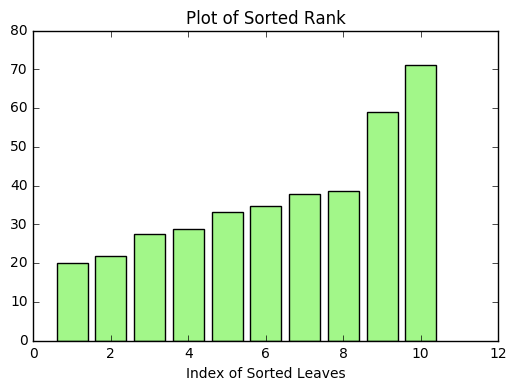

In [5]:
feature_names = X_df.columns
leaf_values = gather_leaf_values(sk_ensemble, X_df,
                                 feature_names,
                                 gather_method='aggregate')

leaf_rank_barplot(leaf_values, n_top=10,
                  rank_method='absolute-sum', print_leaf_paths=True)
plt.show()